## Import libraries

In [1]:
# NBVAL_IGNORE_OUTPUT
# ^this is a magic comment to work around this issue https://github.com/ebmdatalab/custom-docker/issues/10
import pandas as pd
from lib.generate_measure_sql import get_measure_json, build_sql
from change_detection import functions as chg
from lib.regression import rd

In [2]:
## When not using cached data, this needs to be run first time
## after set up of docker environment (to authenticate BigQuery)
#from ebmdatalab import bq
#bq.cached_read("nothing",csv_path="nothing")

# Define measures and build measure SQL

In [3]:
measures = ["desogestrel","trimethoprim"]
run_name = "first_go"
get_measure_json(measures, run_name)
build_sql(run_name)

desogestrel
trimethoprim


# Run change detection on all measures

In [4]:
change = chg.ChangeDetection(
    name=run_name,
    measure=True,
    custom_measure=True,
    direction="down",
    use_cache=True,
    overwrite=False,
    verbose=False,
    draw_figures="no")
change.run()

In [5]:
changes = change.concatenate_outputs()
changes.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure     name                                             
desogestrel A81001          2       43.0              43.0   
            A81002          2       43.0              43.0   
            A81004          2       40.0              40.0   
            A81005          4       47.0              47.0   
            A81006          1       30.0              30.0   

                    is.tfirst.pknown.offs  is.tfirst.offs  is.tfirst.big  \
measure     name                                                           
desogestrel A81001                    inf             inf           43.0   
            A81002                   43.0            43.0           43.0   
            A81004                   40.0            40.0           40.0   
            A81005                   47.0            47.0           47.0   
            A81006                   30.0            30.0           30.0   

                    is.slope.ma  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure     name                                                          
desogestrel A81001    -0.016129         -0.016390              0.823200   
            A81002    -0.001877         -0.002250              0.514286   
            A81004    -0.043145         -0.047181              0.506147   
            A81005    -0.065449         -0.123084              0.585895   
            A81006    -0.002946         -0.003007              0.506024   

                    is.intlev.initlev  is.intlev.finallev  is.intlev.levd  \
measure     name                                                            
desogestrel A81001           1.000219            0.961033        0.039186   
            A81002           0.836085            0.704689        0.131396   
            A81004           0.957613            0.275673        0.681940   
            A81005           0.981999            0.003415        0.978584   
            A81006           0.982878            0.738334        0.244543   

                    is.intlev.levdprop  
measure     name                        
desogestrel A81001            0.039178  
            A81002            0.157157  
            A81004            0.712125  
            A81005            0.996522  
            A81006            0.248804

# Determine changes at national level for comparison

In [6]:
change.num_cores = 1
change.national_changes()

In [7]:
changes_nat = change.concatenate_outputs("_national")
changes_nat = changes_nat.reset_index(level=1)
changes_nat

,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
measure,,,,,,,,,,,,,,
desogestrel,data.pick...pick.rel.,5,14,14,41,41,41,-0.006536,-0.008660,0.500566,0.755987,0.312057,0.443931,0.587220
trimethoprim,data.pick...pick.rel.,10,15,15,15,15,72,-0.010957,-0.015672,0.509754,0.703240,0.273358,0.429881,0.611287


# Compare practice level changes with national changes

In [8]:
difference = changes - changes_nat
difference.head()

is.intlev.finallev  is.intlev.initlev  is.intlev.levd  \
measure     name                                                            
desogestrel A81001            0.648976           0.244232       -0.404744   
            A81002            0.392632           0.080098       -0.312534   
            A81004           -0.036384           0.201625        0.238009   
            A81005           -0.308642           0.226012        0.534654   
            A81006            0.426277           0.226890       -0.199387   

                    is.intlev.levdprop  is.nbreak  is.slope.ma  \
measure     name                                                 
desogestrel A81001           -0.548042         -3    -0.009593   
            A81002           -0.430063         -3     0.004659   
            A81004            0.124905         -3    -0.036609   
            A81005            0.409303         -1    -0.058913   
            A81006           -0.338416         -4     0.003589   

                    is.slope.ma.prop  is.slope.ma.prop.lev  is.tfirst  \
measure     name                                                        
desogestrel A81001         -0.007730              0.322634       29.0   
            A81002          0.006409              0.013719       29.0   
            A81004         -0.038521              0.005581       26.0   
            A81005         -0.114425              0.085329       33.0   
            A81006          0.005653              0.005458       16.0   

                    is.tfirst.big  is.tfirst.offs  is.tfirst.pknown  \
measure     name                                                      
desogestrel A81001            2.0             inf              29.0   
            A81002            2.0             2.0              29.0   
            A81004           -1.0            -1.0              26.0   
            A81005            6.0             6.0              33.0   
            A81006          -11.0           -11.0              16.0   

                    is.tfirst.pknown.offs name  
measure     name                                
desogestrel A81001                    inf  NaN  
            A81002                    2.0  NaN  
            A81004                   -1.0  NaN  
            A81005                    6.0  NaN  
            A81006                  -11.0  NaN

# Get other regression variables

In [9]:
reg_data = rd.get_data()
reg_data.head()

,TOTAL_PATIENTS,TOTAL_DISP_PATIENTS,TOTAL_GP_HC,TOTAL_GP_FTE,SINGLE_HANDED,DISPENSING_BIN,GP_FTE_PER_10000,list_size,Deprivation score (IMD 2015),% who have a positive experience of their GP practice,...,pct,total_items,CL,PH,PHAS,QOF_TOTAL,Principal_Supplier,LSOA11NM,ruc11cd,RUC11
code,,,,,,,,,,,,,,,,,,,,,
A81001,4103.0,0.0,3.0,3.066667,0.0,0.0,7.474206,4097.083333,29.140310,81.489722,...,00K,94138.0,430.16,96.46,25.92,552.54,TPP,Stockton-on-Tees 014G,C,Urban city and town
A81002,19357.0,0.0,13.0,11.706667,0.0,0.0,6.047769,19829.750000,29.689706,85.932369,...,00K,451497.0,432.74,97.00,27.00,556.74,TPP,Stockton-on-Tees 014F,C,Urban city and town
A81003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00K,NaN,NaN,NaN,NaN,NaN,NaN,Hartlepool 007D,C,Urban city and town
A81004,10941.0,0.0,4.0,3.186667,0.0,0.0,2.912592,10307.333333,34.411828,94.128403,...,00M,214788.0,431.60,97.00,27.00,555.60,TPP,Middlesbrough 015C,C,Urban city and town
A81005,8072.0,0.0,10.0,8.076800,0.0,0.0,10.005946,8020.416667,15.743812,92.121005,...,00M,195485.0,430.97,96.67,27.00,554.64,TPP,Redcar and Cleveland 018A,C,Urban city and town


# Merge outcome(s) with regression variables and export to Stata
- Stata code currently run separately
- Future: convert to use R

In [10]:
biggest_change = difference[["is.tfirst.big"]].groupby(level=1).sum()
data_for_stata = biggest_change.join(reg_data,how="left")
data_for_stata.to_csv("../lib/regression/data/data_for_stata.csv")
data_for_stata.head()

,is.tfirst.big,TOTAL_PATIENTS,TOTAL_DISP_PATIENTS,TOTAL_GP_HC,TOTAL_GP_FTE,SINGLE_HANDED,DISPENSING_BIN,GP_FTE_PER_10000,list_size,Deprivation score (IMD 2015),...,pct,total_items,CL,PH,PHAS,QOF_TOTAL,Principal_Supplier,LSOA11NM,ruc11cd,RUC11
A81001,5.0,4103.0,0.0,3.0,3.066667,0.0,0.0,7.474206,4097.083333,29.140310,...,00K,94138.0,430.16,96.46,25.92,552.54,TPP,Stockton-on-Tees 014G,C,Urban city and town
A81002,13.0,19357.0,0.0,13.0,11.706667,0.0,0.0,6.047769,19829.750000,29.689706,...,00K,451497.0,432.74,97.00,27.00,556.74,TPP,Stockton-on-Tees 014F,C,Urban city and town
A81004,10.0,10941.0,0.0,4.0,3.186667,0.0,0.0,2.912592,10307.333333,34.411828,...,00M,214788.0,431.60,97.00,27.00,555.60,TPP,Middlesbrough 015C,C,Urban city and town
A81005,14.0,8072.0,0.0,10.0,8.076800,0.0,0.0,10.005946,8020.416667,15.743812,...,00M,195485.0,430.97,96.67,27.00,554.64,TPP,Redcar and Cleveland 018A,C,Urban city and town
A81006,0.0,14784.0,0.0,10.0,7.520000,0.0,0.0,5.086580,14520.750000,31.791515,...,00K,346425.0,417.78,97.00,25.93,540.71,TPP,Stockton-on-Tees 014F,C,Urban city and town


# Explore outcomes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ceda1c2b0>]],
      dtype=object)

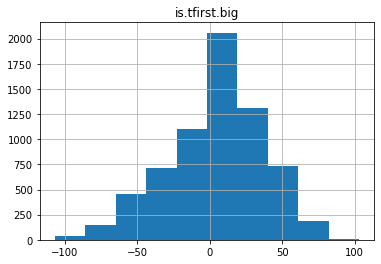

In [11]:
biggest_change.hist()

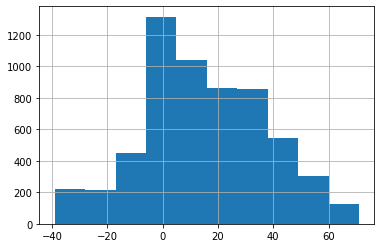

In [12]:
difference.loc["desogestrel","is.tfirst.big"].hist()

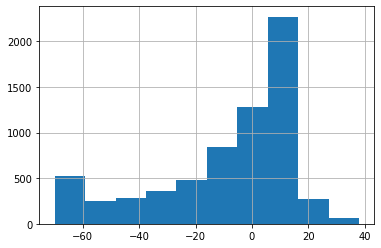

In [13]:
difference.loc["trimethoprim","is.tfirst.big"].hist()

In [14]:
difference.loc["trimethoprim","is.slope.ma.prop"].describe()

count    6.609000e+03
mean    -8.171271e+10
std      5.895468e+12
min     -4.765868e+14
25%     -1.009419e-01
50%     -1.939004e-02
75%      8.506437e-04
max      1.577563e+00
Name: is.slope.ma.prop, dtype: float64

In [15]:
difference.loc["trimethoprim","is.intlev.levdprop"].describe()

count    6610.000000
mean        0.037605
std         0.157117
min        -3.003050
25%        -0.040245
50%         0.051617
75%         0.135234
max         0.388548
Name: is.intlev.levdprop, dtype: float64